# What do I want to do?
* Average melee strength and attack type strength of all viable melee weapons and their distribution

* Extract JSON object of all weapons 40str or higher and clean them manually

In [130]:
import pandas as pd
import numpy as np

from utils import load_json, save_json

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import mpltern
import json

print("Setup Complete")

Setup Complete


In [131]:
two_hand_weapons = load_json("data/filtered_2h_weapons.json")
weapons = load_json("data/filtered_weapons.json")

In [132]:
def get_weapon_names(weapons):
    return [weapon_info["name"] for weapon_id, weapon_info in weapons.items()]


two_hand_weapon_names = get_weapon_names(two_hand_weapons)
weapon_names = get_weapon_names(weapons)

print(', '.join(two_hand_weapon_names))
print(', '.join(weapon_names))


Abyssal bludgeon, Armadyl godsword, Bandos godsword, Barrelchest anchor, Burning claws, Colossal blade, Crystal halberd, Dharok's greataxe, Dragon 2h sword, Dragon 2h sword, Dragon claws, Dragon halberd, Dragon spear, Dual macuahuitl, Elder maul, Elder maul, Granite maul, Guthan's warspear, Leaf-bladed spear, Noxious halberd, Saradomin godsword, Saradomin sword, Sara's blessed sword (full), Scythe of vitur, Soulreaper axe, Torag's hammers, Tzhaar-ket-om, Verac's flail, Zamorak godsword, Zamorakian spear
Abyssal dagger, Abyssal tentacle, Abyssal whip, Blade of saeldor, Dragon battleaxe, Dragon dagger, Dragon hasta, Dragon hunter lance, Dragon longsword, Dragon mace, Dragon scimitar, Dragon scimitar, Dragon sword, Dragon sword, Dragon warhammer, Dragon warhammer, Ghrazi rapier, Granite hammer, Granite longsword, Inquisitor's mace, Keris partisan, Leaf-bladed battleaxe, Leaf-bladed sword, Osmumten's khopesh, Sarachnis cudgel, Toktz-xil-ak, Toktz-xil-ak, Toktz-xil-ek, Tzhaar-ket-em, Viggor

In [133]:
"""Generates individual non-relational lists of strength and attack stats greater than zero from the selected JSON file
"""

def get_attack_and_strength(weapons):
    attack_stab = []
    attack_slash = []
    attack_crush = []
    melee_strength = []

    for weapon_id, weapon_info in weapons.items():
        stab_stat = weapon_info["equipment"]["attack_stab"]
        slash_stat = weapon_info["equipment"]["attack_slash"]
        crush_stat = weapon_info["equipment"]["attack_crush"]
        melee_stat = weapon_info["equipment"]["melee_strength"]

        if stab_stat > 0:
            attack_stab.append(stab_stat)
        if slash_stat > 0:
            attack_slash.append(slash_stat)
        if crush_stat > 0:
            attack_crush.append(crush_stat)
        if melee_stat > 0:
            melee_strength.append(melee_stat)
            
    return (attack_stab, attack_slash, attack_crush, melee_strength)


attack_stab, attack_slash, attack_crush, melee_strength = get_attack_and_strength(weapons)
two_hand_attack_stab, two_hand_attack_slash, two_hand_attack_crush, two_hand_melee_strength = get_attack_and_strength(
    two_hand_weapons)

In [134]:
attack_counts = {}

attack_counts["stab_count"] = len(attack_stab)
attack_counts["slash_count"] = len(attack_slash)
attack_counts["crush_count"] = len(attack_crush)

attack_counts["two_hand_stab_count"] = len(two_hand_attack_stab)
attack_counts["two_hand_slash_count"] = len(two_hand_attack_slash)
attack_counts["two_hand_crush_count"] = len(two_hand_attack_crush)

print(attack_counts)

{'stab_count': 23, 'slash_count': 23, 'crush_count': 15, 'two_hand_stab_count': 13, 'two_hand_slash_count': 22, 'two_hand_crush_count': 26}


In [135]:
"""Gets the average of each strength and attack stat list. Prints a dictionary for one hand weapon averages, two hand weapon averages, and combined stat averages with all weapons.
"""

def get_averages(**kwargs: list[int | float]) -> dict[str, float]:
    averages = {}

    for name, values in kwargs.items():
        averages[name] = round(sum(values) / len(values) if values else 0, 2)

    return averages


stat_averages = get_averages(
    melee_strength=melee_strength,
    attack_stab=attack_stab,
    attack_slash=attack_slash,
    attack_crush=attack_crush
)

two_hand_stat_averages = get_averages(
    melee_strength=two_hand_melee_strength,
    attack_stab=two_hand_attack_stab,
    attack_slash=two_hand_attack_slash,
    attack_crush=two_hand_attack_crush
)

combined_averages = get_averages(
    melee_strength=[*melee_strength, *two_hand_melee_strength],
    attack_stab=[*attack_stab, *two_hand_attack_stab],
    attack_slash=[*attack_slash, *two_hand_attack_slash],
    attack_crush=[*attack_crush, *two_hand_attack_crush]
)

print("One hand averages:", stat_averages)
print("Two hand averages:", two_hand_stat_averages)
print("Combined averages:", combined_averages)

One hand averages: {'melee_strength': 69.94, 'attack_stab': 54.96, 'attack_slash': 63.35, 'attack_crush': 71.33}
Two hand averages: {'melee_strength': 95.0, 'attack_stab': 66.31, 'attack_slash': 93.14, 'attack_crush': 77.12}
Combined averages: {'melee_strength': 82.06, 'attack_stab': 59.06, 'attack_slash': 77.91, 'attack_crush': 75.0}


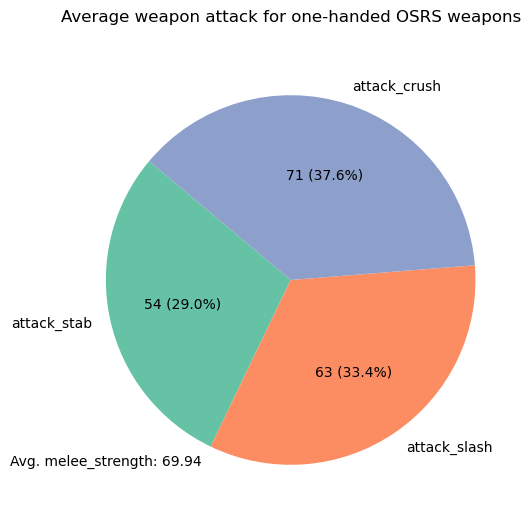

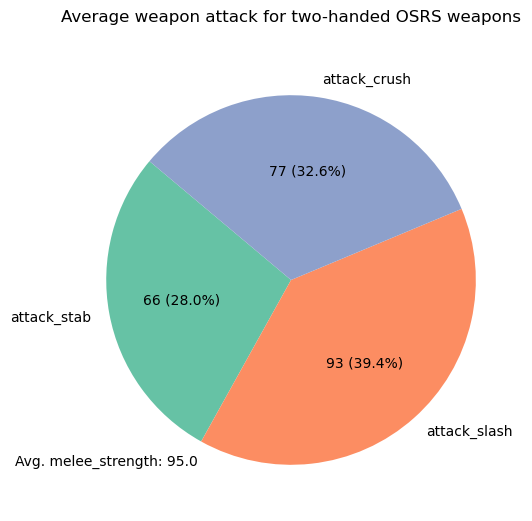

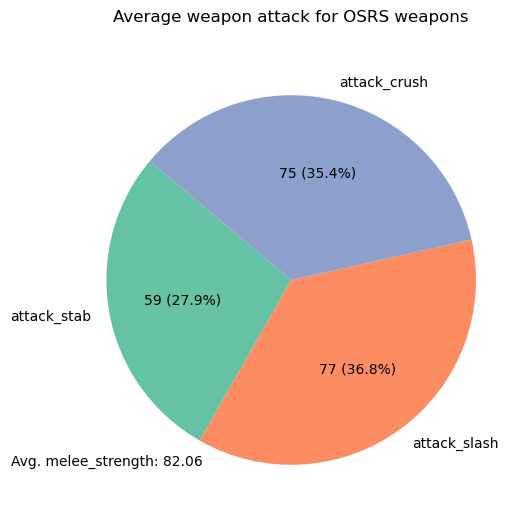

In [136]:
def create_attack_pie_chart(data, title):
    filtered_data = {k: v for k, v in data.items() if k != "melee_strength"}

    labels = filtered_data.keys()
    sizes = filtered_data.values()

    colors = ['#66c2a5', '#fc8d62', '#8da0cb']

    plt.figure(figsize=(8, 6))
    plt.pie(
        sizes, labels=labels, colors=colors[:len(filtered_data)],
        autopct=lambda p: f'{int(p * sum(sizes) / 100)} ({p:.1f}%)', startangle=140
    )
    
    plt.title(title, pad=20)
    plt.text(-1, -1, f'Avg. melee_strength: {data["melee_strength"]}', fontsize=10, ha='center')

    plt.show()


create_attack_pie_chart(stat_averages, "Average weapon attack for one-handed OSRS weapons")
create_attack_pie_chart(two_hand_stat_averages, "Average weapon attack for two-handed OSRS weapons")
create_attack_pie_chart(combined_averages, "Average weapon attack for OSRS weapons")

In [137]:
"""Generates relational tuple of lists containing weapon stats from the JSON datasets for use in ternary plots. Some OSRS weapons have minor negative values in certain attack types, these have been removed due to limitations with mpltern.
"""

def get_attack_and_strength_ternary_data(weapons):
    attack_stab = []
    attack_slash = []
    attack_crush = []
    melee_strength = []
    weapon_names = []  # List to store weapon names

    for weapon_id, weapon_info in weapons.items():
        stab_stat = weapon_info["equipment"]["attack_stab"]
        slash_stat = weapon_info["equipment"]["attack_slash"]
        crush_stat = weapon_info["equipment"]["attack_crush"]
        melee_stat = weapon_info["equipment"]["melee_strength"]
        weapon_name = weapon_info["name"]  # Assuming the name is stored under the key "name"

        if stab_stat < 0:
            attack_stab.append(0)
        else:
            attack_stab.append(stab_stat)

        if slash_stat < 0:
            attack_slash.append(0)
        else:
            attack_slash.append(slash_stat)

        if crush_stat < 0:
            attack_crush.append(0)
        else:
            attack_crush.append(crush_stat)

        melee_strength.append(melee_stat)
        weapon_names.append(weapon_name)  # Collect weapon names

    return (attack_stab, attack_slash, attack_crush, melee_strength, weapon_names)


t, l, r, v, names = get_attack_and_strength_ternary_data(weapons)
t2, l2, r2, v2, names2 = get_attack_and_strength_ternary_data(two_hand_weapons)

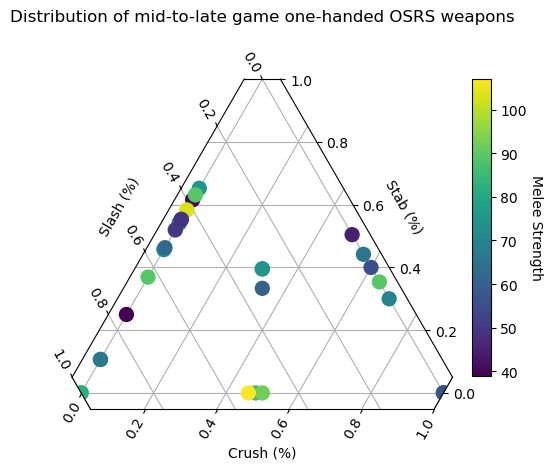

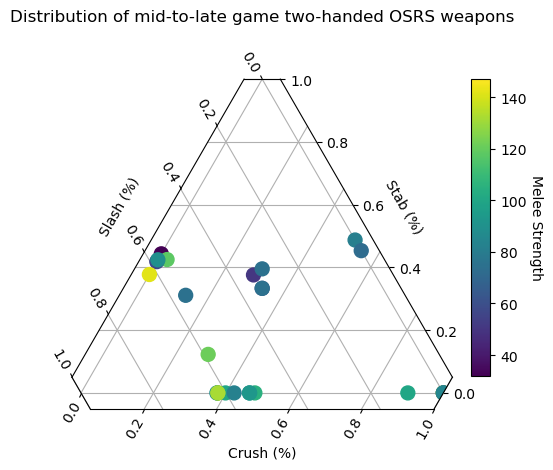

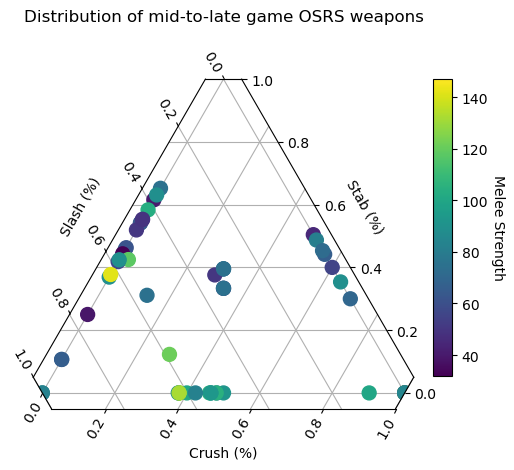

In [138]:
def create_ternary_scatter_plot(t, l, r, v, title):
    fig = plt.figure(figsize=(10.8, 4.8))
    ax = fig.add_subplot(1, 2, 2, projection='ternary')
    
    scatter = ax.scatter(t, l, r, c=v, cmap='viridis', s=100)
    
    ax.set_title(title, pad=20)
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_tlabel("Stab (%)")
    ax.set_llabel("Slash (%)")
    ax.set_rlabel("Crush (%)")
    ax.set_tlim(-0.05, 1)
    ax.set_llim(-0.05, 1)
    ax.set_rlim(-0.05, 1)
    ax.taxis.set_label_position("tick1")
    ax.laxis.set_label_position("tick1")
    ax.raxis.set_label_position("tick1")
  
    cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
    colorbar = fig.colorbar(scatter, cax=cax)
    colorbar.set_label('Melee Strength', rotation=270, va='baseline')
    
    plt.show()

create_ternary_scatter_plot(t, l, r, v, "Distribution of mid-to-late game one-handed OSRS weapons")
create_ternary_scatter_plot(t2, l2, r2, v2, "Distribution of mid-to-late game two-handed OSRS weapons")
create_ternary_scatter_plot(t + t2, l + l2, r + r2, v + v2, "Distribution of mid-to-late game OSRS weapons")

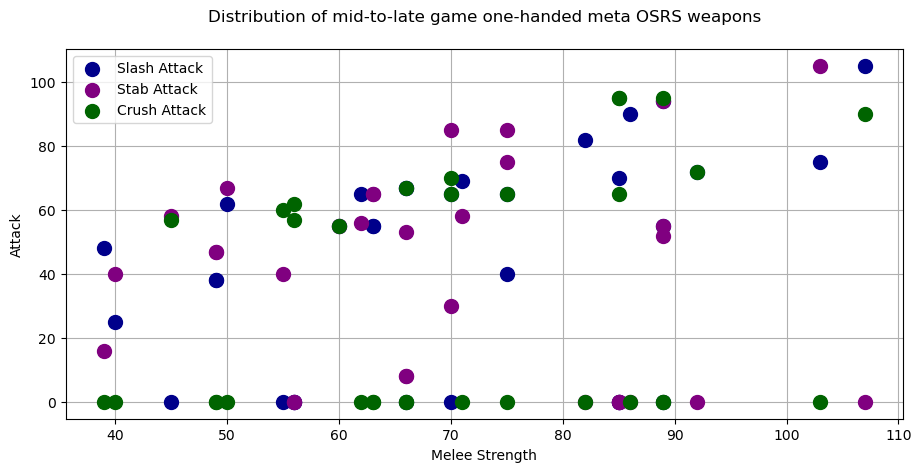

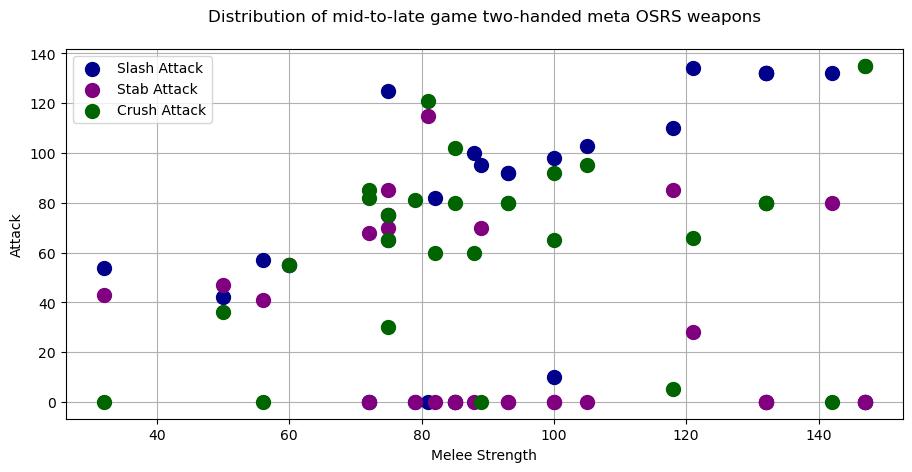

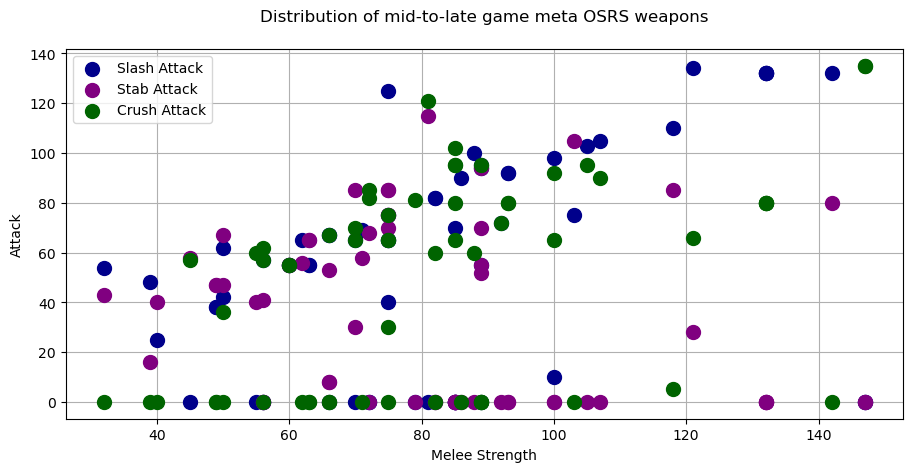

In [139]:
def create_stacked_scatter_plot(t, l, r, v, title):
    fig, ax = plt.subplots(figsize=(10.8, 4.8))

    ax.scatter(v, l, label='Slash Attack', c='darkblue', s=100)
    ax.scatter(v, t, label='Stab Attack', c='purple', s=100)
    ax.scatter(v, r, label='Crush Attack', c='darkgreen', s=100)

    ax.set_title(title, pad=20)
    ax.set_xlabel('Melee Strength')
    ax.set_ylabel('Attack')
    ax.legend()
    ax.set_axisbelow(True)
    ax.grid(True)
    
    plt.show()

create_stacked_scatter_plot(t, l, r, v, "Distribution of mid-to-late game one-handed meta OSRS weapons")
create_stacked_scatter_plot(t2, l2, r2, v2, "Distribution of mid-to-late game two-handed meta OSRS weapons")
create_stacked_scatter_plot(t + t2, l + l2, r + r2, v + v2, "Distribution of mid-to-late game meta OSRS weapons")